# Normal Task (Phase - 2) - Email Spam Detection


### Probelm Statement - The goal of this project is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or legitimate (ham)

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Spam_Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

# Exploratory Data Analysis (Target)

In [6]:
target = df['Category'].value_counts()
target

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

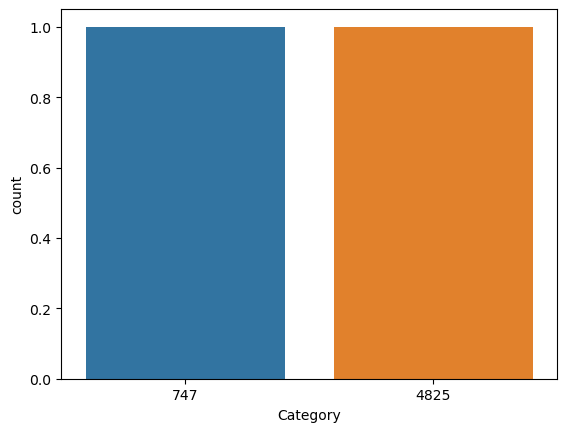

In [7]:
sns.countplot(target)

# Label Encoding

In [8]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [9]:
df['Category']

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

# Training Data

In [10]:
x = df['Message']
y = df['Category']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 20)

In [12]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words ='english', lowercase = 'True')
x_train_features = feature_extraction.fit_transform(x_train) 
x_test_features = feature_extraction.transform(x_test)

In [13]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Training Model

# Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(x_train_features, y_train)

LogisticRegression()

In [15]:
lr_pred = lr.predict(x_train_features)
lr_pred

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
print('Accuracy of train data',accuracy_score(y_train, lr_pred)*100)

Accuracy of train data 96.7915638321741


In [17]:
lr_test_pred = lr.predict(x_test_features)
lr_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
print('Accuracy of test data - ',accuracy_score(y_test, lr_test_pred)*100)

Accuracy of test data -  96.05381165919282


In [19]:
cm = confusion_matrix(y_test, lr_test_pred)
cm

array([[106,  42],
       [  2, 965]], dtype=int64)

In [20]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       148
           1       0.96      1.00      0.98       967

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# Decision Tree Classifier

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_features, y_train)

DecisionTreeClassifier()

In [22]:
dtc_pred = dtc.predict(x_train_features)
dtc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
print('Accuracy of train data - ',accuracy_score(y_train, dtc_pred)*100)

Accuracy of train data -  100.0


In [24]:
dtc_test_pred = dtc.predict(x_test_features)
dtc_test_pred

array([1, 1, 1, ..., 1, 1, 0])

In [25]:
print('Accuracy of test data - ',accuracy_score(y_test, dtc_test_pred)*100)

Accuracy of test data -  96.7713004484305


In [26]:
cm = confusion_matrix(y_test, dtc_test_pred)
cm

array([[130,  18],
       [ 18, 949]], dtype=int64)

In [27]:
print(classification_report(y_test, dtc_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       148
           1       0.98      0.98      0.98       967

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# Random Forest Classifier

In [28]:
rfc = RandomForestClassifier()
rfc.fit(x_train_features, y_train)

RandomForestClassifier()

In [29]:
rfc_pred = rfc.predict(x_train_features)
rfc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
print('Accuracy of train data - ',accuracy_score(y_train, rfc_pred)*100)

Accuracy of train data -  100.0


In [31]:
rfc_test_pred = rfc.predict(x_test_features)
rfc_test_pred

array([1, 1, 1, ..., 1, 1, 0])

In [32]:
print('Accuracy of test data - ',accuracy_score(y_test, rfc_test_pred)*100)

Accuracy of test data -  98.20627802690582


In [33]:
cm = confusion_matrix(y_test, rfc_test_pred)
cm

array([[130,  18],
       [  2, 965]], dtype=int64)

In [34]:
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       148
           1       0.98      1.00      0.99       967

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Predicting using Most Accurate Model - Random Forest Classifier

In [35]:
input_mail = ["How are you?,Buddy"]

input_data_features = feature_extraction.transform(input_mail)

prediction = rfc.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


# Observation - 
## Logistic Regression model with 96.79 accuracy
## Decision Tree Classifier model with 96.77 accuracy
## Random Forest Classifier model with 98.20 accuracy 

# Author - Hitesh Choudhary